# Step one: retreive dataset from WOS and preprocessing data before analysis

In [1]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Set working directory
%cd /content/drive/MyDrive/Research/Datasets/

/content/drive/MyDrive/Research/Datasets


In [3]:

import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
# preprocess the text data for analysis
# Download necessary NLTK data (if not already done)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Download the punkt_tab resource
# load year 2020 data for generative AI related paper
with open("savedrecs2020.txt", "r", encoding="utf-8") as file:
    text2020 = file.read()
#load year 2021 data for generative AI related paper
with open("savedrecs2021.txt", "r", encoding="utf-8") as file:
    text2021 = file.read()
#load year 2022 data for generative AI related paper
with open("savedrecs2022.txt", "r", encoding="utf-8") as file:
    text2022 = file.read()
#load year 2023 data for generative AI related paper
with open("savedrecs2023.txt", "r", encoding="utf-8") as file:
    text2023 = file.read()
#load year 2024 data for generative AI related paper
with open("savedrecs2024.txt", "r", encoding="utf-8") as file:
    text2024 = file.read()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


# Step Two: Keyword Co-Occurrence Network Analysis

**Analysis 2020 data**

[nltk_data] Downloading package wordnet to /root/nltk_data...


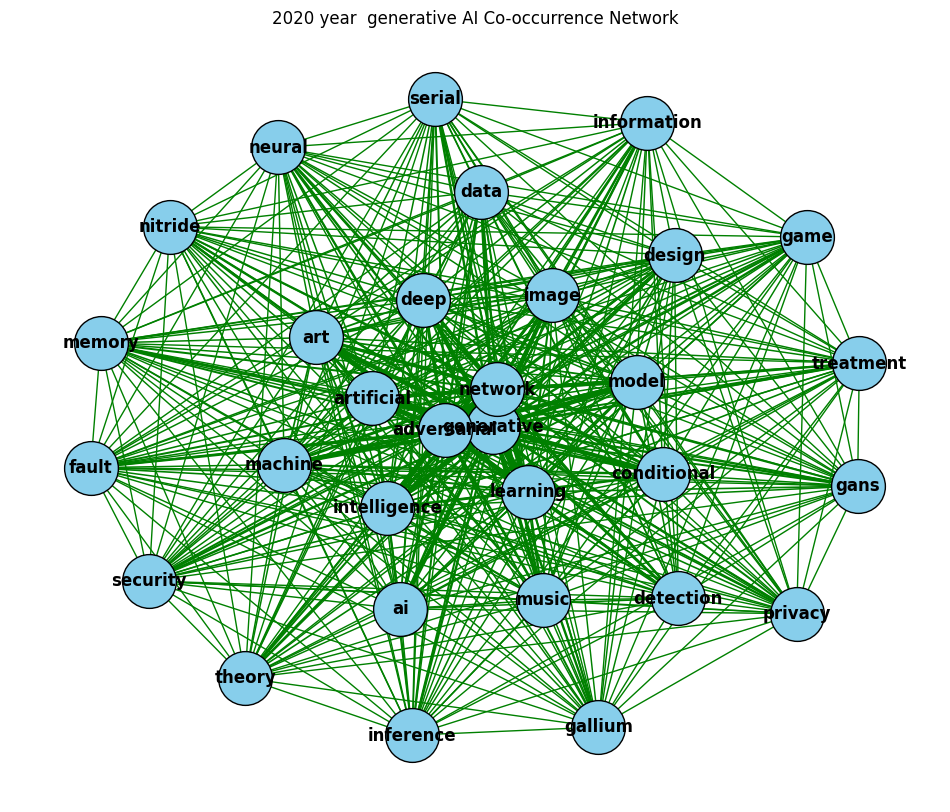

In [4]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import networkx as nx
import matplotlib.pyplot as plt
import itertools
import re
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from collections import Counter
import numpy as np

# analysis year 2020 data

keywords_pattern = r"DE\s(.*)"
keywords_matches = re.findall(keywords_pattern, text2020)

# Build co-occurrence network
G_2020 = nx.Graph()

keywords_list = [kw.strip().lower() for match in keywords_matches for kw in match.split(";")]
# Tokenize the text into words
tokenized_keywords = [word_tokenize(kw) for kw in keywords_list]
# Flatten the list (convert list of lists into a single list)
flat_tokens = [word for sublist in tokenized_keywords for word in sublist]
# Convert to lower case
flat_tokens = [word.lower() for word in flat_tokens]

# Remove punctuation and numbers
flat_tokens = [word for word in flat_tokens if word.isalpha()]

# Remove stopwords
stop_words = set(stopwords.words('english'))
flat_tokens = [word for word in flat_tokens if word not in stop_words]

# Lemmatize
lemmatizer = WordNetLemmatizer()
flat_tokens = [lemmatizer.lemmatize(word) for word in flat_tokens]

#change all creative to creativity since lemmatize not working on this specific pattern
flat_tokens = ['creativity' if word == 'creative' else word for word in flat_tokens]

# remove low frequency word
token_counts = Counter(flat_tokens)
min_frequency = 2
flat_tokens = [token for token in flat_tokens if token_counts[token] >= min_frequency]

# Build Co-occurrence Edges
tokenized_lists = [flat_tokens]
for keyword_list in tokenized_lists:
    for item1, item2 in itertools.combinations(keyword_list, 2):
      if item1 != item2:
        if G_2020.has_edge(item1, item2):
            G_2020[item1][item2]['weight'] += 1
        else:
            G_2020.add_edge(item1, item2, weight=1)
# Extract Subgraph
subgraph = G_2020.edge_subgraph([(u, v) for u, v in G_2020.edges()])
# normalize edge weight for visulizaition
weights = [d['weight'] for _, _, d in subgraph.edges(data=True)]
if weights:  # Ensure non-empty weights
    min_w, max_w = min(weights), max(weights)
    edge_widths = [(w - min_w) / (max_w - min_w + 1e-5) * 10 + 1 for w in weights]  # Normalize to range [1,10]
else:
    edge_widths = [1] * len(subgraph.edges())  # Default width if no edges


# Visualization with weighted edges
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(subgraph, k=0.5)
nx.draw_networkx_nodes(subgraph, pos, node_size=1500, node_color="skyblue", edgecolors="black")
nx.draw_networkx_edges(subgraph, pos, width=edge_widths, edge_color="green")
nx.draw_networkx_labels(subgraph, pos, font_size=12, font_weight="bold")

plt.title("2020 year  generative AI Co-occurrence Network")
plt.axis('off')
plt.show()





**Analysis 2021 data**

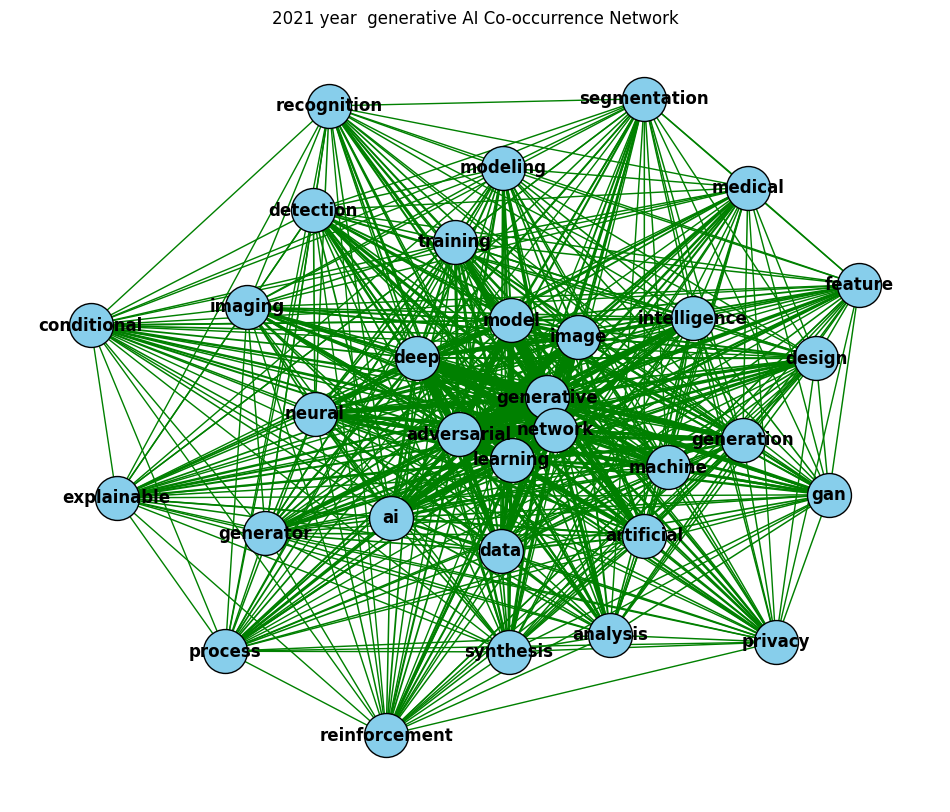

In [5]:

# Analysis year 2021 data, to make it more clear, I only pick top 100 weighted node
# Extract author keywords from "DE" (Descriptors) field
keywords_pattern = r"DE\s(.*)"
keywords_matches = re.findall(keywords_pattern, text2021)

# Build co-occurrence network
G_2021 = nx.Graph()

keywords_list = [kw.strip().lower() for match in keywords_matches for kw in match.split(";")]
# Tokenize the text into words
tokenized_keywords = [word_tokenize(kw) for kw in keywords_list]
# Flatten the list (convert list of lists into a single list)
flat_tokens = [word for sublist in tokenized_keywords for word in sublist]
# Convert to lower case
flat_tokens = [word.lower() for word in flat_tokens]

# Remove punctuation and numbers
flat_tokens = [word for word in flat_tokens if word.isalpha()]

# Remove stopwords
stop_words = set(stopwords.words('english'))
flat_tokens = [word for word in flat_tokens if word not in stop_words]
# Lemmatize
lemmatizer = WordNetLemmatizer()
flat_tokens = [lemmatizer.lemmatize(word) for word in flat_tokens]

#change all creative to creativity since lemmatize not working on this specific pattern
flat_tokens = ['creativity' if word == 'creative' else word for word in flat_tokens]

# remove low frequency word
token_counts = Counter(flat_tokens)
min_frequency = 8
flat_tokens = [token for token in flat_tokens if token_counts[token] >= min_frequency]

# Build Co-occurrence Edges
tokenized_lists = [flat_tokens]
for keyword_list in tokenized_lists:
    for item1, item2 in itertools.combinations(keyword_list, 2):
      if item1 != item2:
        if G_2021.has_edge(item1, item2):
            G_2021[item1][item2]['weight'] += 1
        else:
            G_2021.add_edge(item1, item2, weight=1)


# Extract Subgraph
subgraph = G_2021.edge_subgraph([(u, v) for u, v in G_2021.edges()])
# normalize edge weight for visulizaition
weights = [d['weight'] for _, _, d in subgraph.edges(data=True)]
if weights:  # Ensure non-empty weights
    min_w, max_w = min(weights), max(weights)
    edge_widths = [(w - min_w) / (max_w - min_w + 1e-5) * 10 + 1 for w in weights]  # Normalize to range [1,10]
else:
    edge_widths = [1] * len(subgraph.edges())  # Default width if no edges


# Visualization with weighted edges
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(subgraph, k=0.5)
nx.draw_networkx_nodes(subgraph, pos, node_size=1000, node_color="skyblue", edgecolors="black")
nx.draw_networkx_edges(subgraph, pos, width=edge_widths, edge_color="green")
nx.draw_networkx_labels(subgraph, pos, font_size=12, font_weight="bold")

plt.title("2021 year  generative AI Co-occurrence Network")
plt.axis('off')
plt.show()


**Analysis 2022 data**

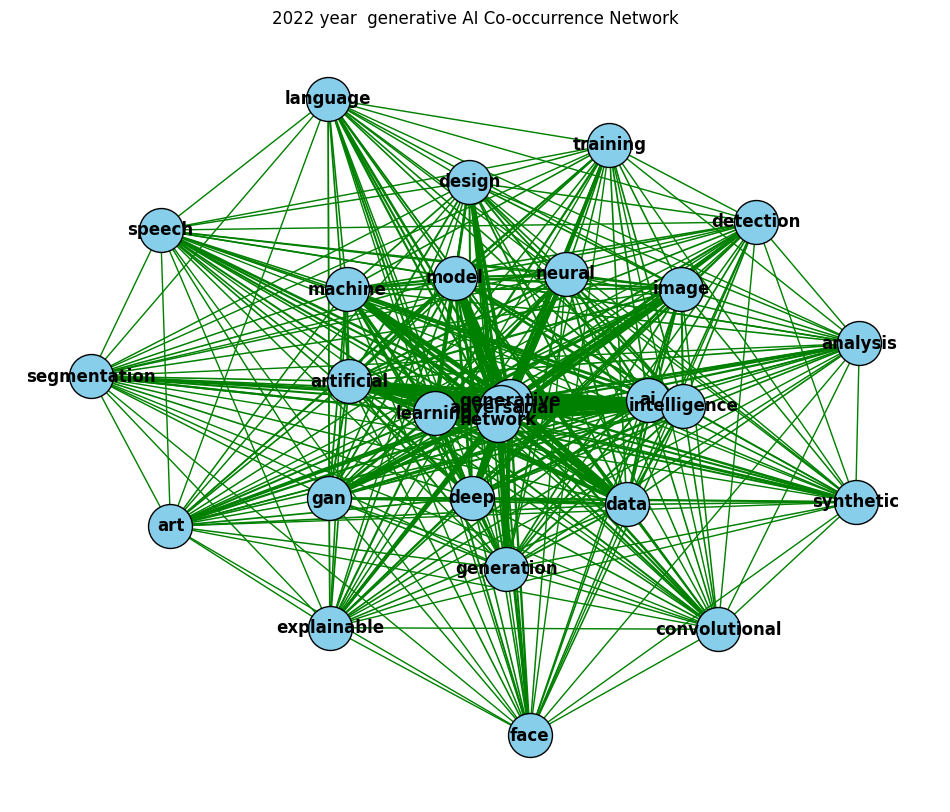

In [6]:
# Analysis 2022 data
keywords_pattern = r"DE\s(.*)"
keywords_matches = re.findall(keywords_pattern, text2022)

# Build co-occurrence network
G_2022 = nx.Graph()

keywords_list = [kw.strip().lower() for match in keywords_matches for kw in match.split(";")]
# Tokenize the text into words
tokenized_keywords = [word_tokenize(kw) for kw in keywords_list]
# Flatten the list (convert list of lists into a single list)
flat_tokens = [word for sublist in tokenized_keywords for word in sublist]
# Convert to lower case
flat_tokens = [word.lower() for word in flat_tokens]

# Remove punctuation and numbers
flat_tokens = [word for word in flat_tokens if word.isalpha()]

# Remove stopwords
stop_words = set(stopwords.words('english'))
flat_tokens = [word for word in flat_tokens if word not in stop_words]

## Lemmatize
lemmatizer = WordNetLemmatizer()
flat_tokens = [lemmatizer.lemmatize(word) for word in flat_tokens]

#change all creative to creativity since lemmatize not working on this specific pattern
flat_tokens = ['creativity' if word == 'creative' else word for word in flat_tokens]

# remove low frequency word
token_counts = Counter(flat_tokens)
min_frequency = 10
flat_tokens = [token for token in flat_tokens if token_counts[token] >= min_frequency]

# Build Co-occurrence Edges
tokenized_lists = [flat_tokens]
for keyword_list in tokenized_lists:
    for item1, item2 in itertools.combinations(keyword_list, 2):
      if item1 != item2:
        if G_2022.has_edge(item1, item2):
            G_2022[item1][item2]['weight'] += 1
        else:
            G_2022.add_edge(item1, item2, weight=1)

# Extract Subgraph
subgraph = G_2022.edge_subgraph([(u, v) for u, v in G_2022.edges()])
# normalize edge weight for visulizaition
weights = [d['weight'] for _, _, d in subgraph.edges(data=True)]
if weights:  # Ensure non-empty weights
    min_w, max_w = min(weights), max(weights)
    edge_widths = [(w - min_w) / (max_w - min_w + 1e-5) * 10 + 1 for w in weights]  # Normalize to range [1,10]
else:
    edge_widths = [1] * len(subgraph.edges())  # Default width if no edges

# Visualization with weighted edges
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(subgraph, k=0.5)
nx.draw_networkx_nodes(subgraph, pos, node_size=1000, node_color="skyblue", edgecolors="black")
nx.draw_networkx_edges(subgraph, pos, width=edge_widths, edge_color="green")
nx.draw_networkx_labels(subgraph, pos, font_size=12, font_weight="bold")

plt.title("2022 year  generative AI Co-occurrence Network")
plt.axis('off')
plt.show()



**Analysis 2023 data**

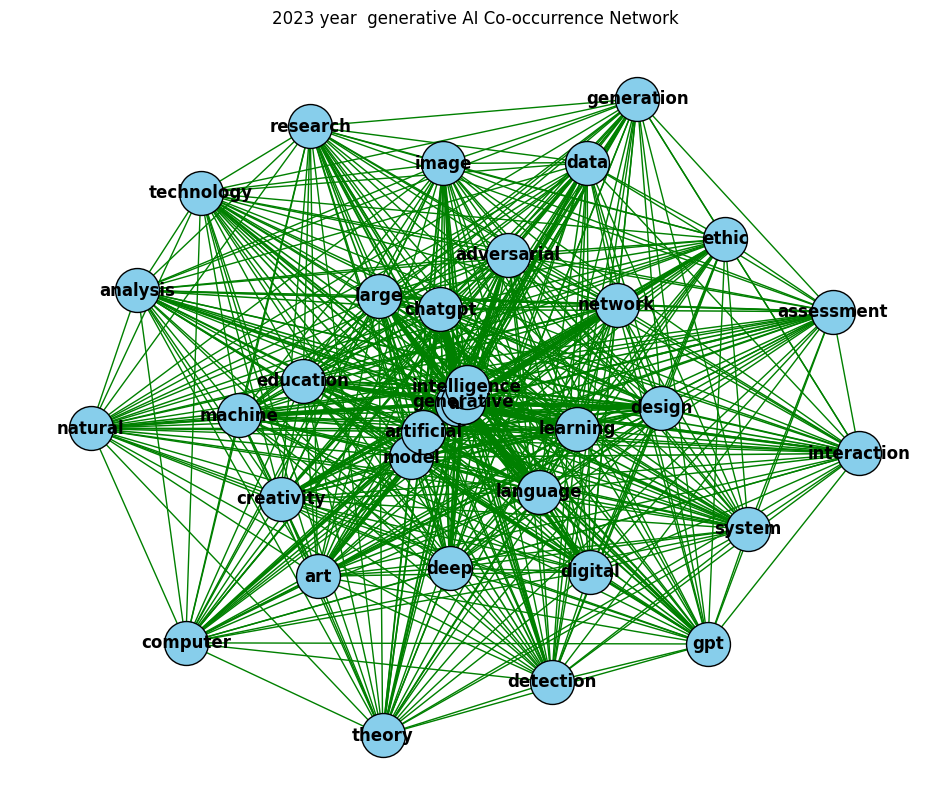

In [7]:
keywords_pattern = r"DE\s(.*)"
keywords_matches = re.findall(keywords_pattern, text2023)

# Build co-occurrence network
G_2023 = nx.Graph()

keywords_list = [kw.strip().lower() for match in keywords_matches for kw in match.split(";")]
# Tokenize the text into words
tokenized_keywords = [word_tokenize(kw) for kw in keywords_list]
# Flatten the list (convert list of lists into a single list)
flat_tokens = [word for sublist in tokenized_keywords for word in sublist]
# Convert to lower case
flat_tokens = [word.lower() for word in flat_tokens]

# Remove punctuation and numbers
flat_tokens = [word for word in flat_tokens if word.isalpha()]

# Remove stopwords
stop_words = set(stopwords.words('english'))
flat_tokens = [word for word in flat_tokens if word not in stop_words]

# Lemmatize
lemmatizer = WordNetLemmatizer()
flat_tokens = [lemmatizer.lemmatize(word) for word in flat_tokens]

#change all creative to creativity since lemmatize not working on this specific pattern
flat_tokens = ['creativity' if word == 'creative' else word for word in flat_tokens]

# remove low frequency word
token_counts = Counter(flat_tokens)
min_frequency = 10
flat_tokens = [token for token in flat_tokens if token_counts[token] >= min_frequency]


# Build Co-occurrence Edges
tokenized_lists = [flat_tokens]
for keyword_list in tokenized_lists:
    for item1, item2 in itertools.combinations(keyword_list, 2):
      if item1 != item2:
        if G_2023.has_edge(item1, item2):
            G_2023[item1][item2]['weight'] += 1
        else:
            G_2023.add_edge(item1, item2, weight=1)

# Extract Subgraph
subgraph = G_2023.edge_subgraph([(u, v) for u, v in G_2023.edges() ])
# normalize edge weight for visulizaition
weights = [d['weight'] for _, _, d in subgraph.edges(data=True)]
if weights:  # Ensure non-empty weights
    min_w, max_w = min(weights), max(weights)
    edge_widths = [(w - min_w) / (max_w - min_w + 1e-5) * 10 + 1 for w in weights]  # Normalize to range [1,10]
else:
    edge_widths = [1] * len(subgraph.edges())  # Default width if no edges

# Visualization with weighted edges
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(subgraph, k=0.5)
nx.draw_networkx_nodes(subgraph, pos, node_size=1000, node_color="skyblue", edgecolors="black")
nx.draw_networkx_edges(subgraph, pos, width=edge_widths, edge_color="green")
nx.draw_networkx_labels(subgraph, pos, font_size=12, font_weight="bold")

plt.title("2023 year  generative AI Co-occurrence Network")
plt.axis('off')
plt.show()




**Analysis 2024 data**

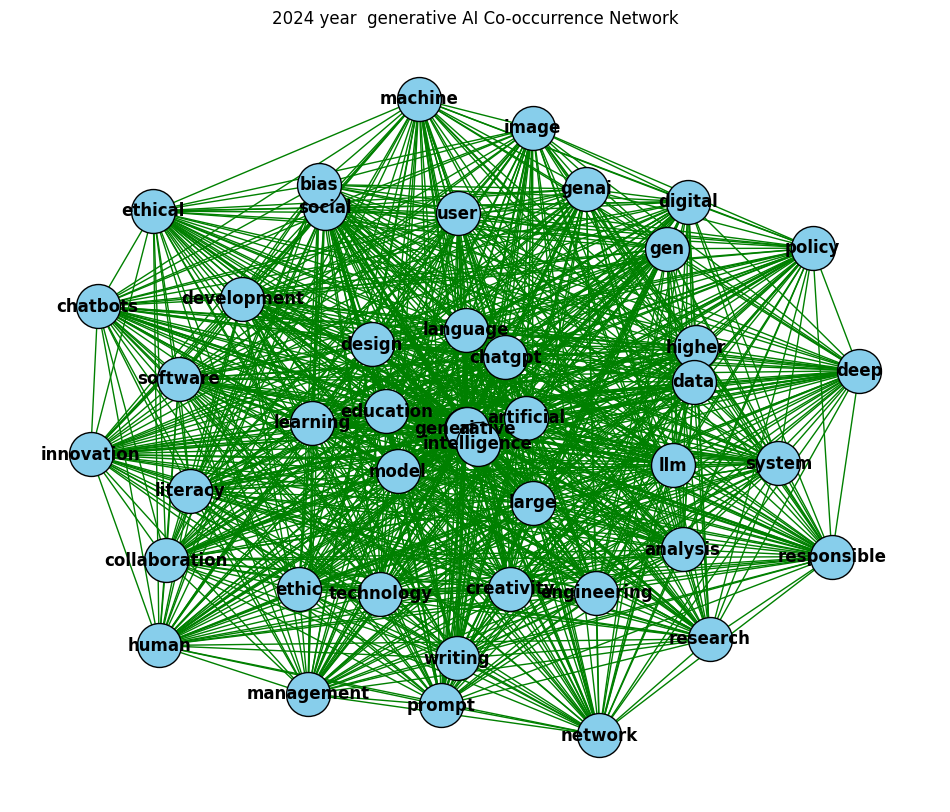

In [8]:
keywords_pattern = r"DE\s(.*)"
keywords_matches = re.findall(keywords_pattern, text2024)

# Build co-occurrence network
G_2024 = nx.Graph()

keywords_list = [kw.strip().lower() for match in keywords_matches for kw in match.split(";")]
# Tokenize the text into words
tokenized_keywords = [word_tokenize(kw) for kw in keywords_list]
# Flatten the list (convert list of lists into a single list)
flat_tokens = [word for sublist in tokenized_keywords for word in sublist]
# Convert to lower case
flat_tokens = [word.lower() for word in flat_tokens]

# Remove punctuation and numbers
flat_tokens = [word for word in flat_tokens if word.isalpha()]

# Remove stopwords
stop_words = set(stopwords.words('english'))
flat_tokens = [word for word in flat_tokens if word not in stop_words]

# Lemmatize
lemmatizer = WordNetLemmatizer()
flat_tokens = [lemmatizer.lemmatize(word) for word in flat_tokens]

#change all creative to creativity since lemmatize not working on this specific pattern
flat_tokens = ['creativity' if word == 'creative' else word for word in flat_tokens]

# remove low frequency word
token_counts = Counter(flat_tokens)
min_frequency = 10
flat_tokens = [token for token in flat_tokens if token_counts[token] >= min_frequency]

# Build Co-occurrence Edges
tokenized_lists = [flat_tokens]
for keyword_list in tokenized_lists:
    for item1, item2 in itertools.combinations(keyword_list, 2):
      if item1 != item2:
        if G_2024.has_edge(item1, item2):
            G_2024[item1][item2]['weight'] += 1
        else:
            G_2024.add_edge(item1, item2, weight=1)

# Extract Subgraph
subgraph = G_2024.edge_subgraph([(u, v) for u, v in G_2024.edges()])

# normalize edge weight for visulizaition
weights = [d['weight'] for _, _, d in subgraph.edges(data=True)]
if weights:  # Ensure non-empty weights
    min_w, max_w = min(weights), max(weights)
    edge_widths = [(w - min_w) / (max_w - min_w + 1e-5) * 10 + 1 for w in weights]  # Normalize to range [1,10]
else:
    edge_widths = [1] * len(subgraph.edges())  # Default width if no edges


# Visualization with weighted edges
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(subgraph, k=0.5)
nx.draw_networkx_nodes(subgraph, pos, node_size=1000, node_color="skyblue", edgecolors="black")
nx.draw_networkx_edges(subgraph, pos, width=edge_widths, edge_color="green")
nx.draw_networkx_labels(subgraph, pos, font_size=12, font_weight="bold")

plt.title("2024 year  generative AI Co-occurrence Network")
plt.axis('off')
plt.show()



# Step3 Identification of Key Research Themes

To dispay the result of weighted network analysis,
here are the following features need to be considered

node level
1.   node strength
2.   weighted clustering
3.   betweenness centrality
4.   Eigenvector Centrality
5.   Closeness Centrality (Weighted)


edge level
1.   Edge Weight Distribution
2.   Jaccard Coefficient


network level


1.   Network Density
2.   Modularity
3.   Average Shortest Path Length
4.   Giant Component Analysis






node level

In [9]:
# create method to analysis node level
def calculate_node_metrics(G):
    # Calculate Node Strength (sum of edge weights per node)
    node_strengths = {node: sum(G[node][neighbor]['weight'] for neighbor in G[node]) for node in G.nodes()}

    # Weighted Clustering Coefficient
    weighted_clustering = nx.clustering(G, weight='weight')

    # Betweenness Centrality
    betweenness_centrality = nx.betweenness_centrality(G, weight='weight')

    # Eigenvector Centrality (Importance of a node based on its connections)
    eigenvector = nx.eigenvector_centrality(G, weight='weight', max_iter=1000)

    # Closeness Centrality (How close a node is to others)
    closeness = nx.closeness_centrality(G, distance='weight')

    # Store results in a DataFrame
    df = pd.DataFrame({
        "Keyword": list(G.nodes()),
        "Node Strength": [node_strengths[node] for node in G.nodes()],
        "Betweenness Centrality": [betweenness_centrality[node] for node in G.nodes()],
        "Closeness Centrality": [closeness[node] for node in G.nodes()],
        "Eigenvector Centrality": [eigenvector[node] for node in G.nodes()],
        "Clustering Coefficient": [weighted_clustering[node] for node in G.nodes()]
    })

    # Sort by Node Strength (Most influential nodes appear first)
    df_sorted = df.sort_values(by="Node Strength", ascending=False)

    return df_sorted

In [10]:
# Node Level on Year 2020
data2020_sorted = calculate_node_metrics(G_2020)
print(data2020_sorted)


         Keyword  Node Strength  Betweenness Centrality  Closeness Centrality  \
0     generative           6510                0.000000              0.010815   
3        network           4446                0.000000              0.016251   
11   adversarial           4300                0.000000              0.016779   
13      learning           2046                0.000000              0.030738   
4     artificial           1512                0.000000              0.037406   
5   intelligence           1330                0.000000              0.040323   
1           deep           1146                0.000000              0.043732   
7            art           1146                0.000000              0.043732   
16         model           1146                0.000000              0.043732   
12         image            960                0.000000              0.048000   
10   conditional            960                0.000000              0.048000   
17       machine            

In [11]:
# Node Level year 2021
data2021_sorted = calculate_node_metrics(G_2021)
print(data2021_sorted)

          Keyword  Node Strength  Betweenness Centrality  \
0      generative         132288                0.000000   
8     adversarial          92803                0.000000   
14        network          91203                0.000000   
5        learning          82260                0.000000   
11           deep          58404                0.000000   
12          model          52195                0.000000   
13          image          46795                0.000000   
7              ai          29220                0.000000   
15           data          29220                0.000000   
6          neural          26379                0.000000   
1      artificial          25428                0.000000   
2    intelligence          23520                0.000000   
21     generation          22563                0.000000   
4         machine          21604                0.000000   
29       training          19680                0.000000   
10       analysis          15808        

In [12]:
# Node Level on year 2022
data2022_sorted = calculate_node_metrics(G_2022)
print(data2022_sorted)

          Keyword  Node Strength  Betweenness Centrality  \
0      generative         206230                     0.0   
8         network         149008                     0.0   
6     adversarial         140530                     0.0   
12       learning         124074                     0.0   
17           deep          65778                     0.0   
4      artificial          61374                     0.0   
1              ai          61374                     0.0   
14          model          60268                     0.0   
5    intelligence          54708                     0.0   
10           data          50224                     0.0   
11        machine          42300                     0.0   
15          image          40018                     0.0   
7          neural          40018                     0.0   
24     generation          30810                     0.0   
16            gan          30810                     0.0   
2          design          28488        

In [13]:
# Node Level on year 2023
data2023_sorted = calculate_node_metrics(G_2023)
print(data2023_sorted)

         Keyword  Node Strength  Betweenness Centrality  Closeness Centrality  \
1     generative         464800                0.000000              0.000267   
0             ai         425056                0.000000              0.000294   
20    artificial         237300                0.000000              0.000504   
17  intelligence         232995                0.000000              0.000511   
5          model         172356                0.000000              0.000642   
10       chatgpt         116340                0.000000              0.000829   
3       learning         111555                0.000000              0.000850   
9       language          95475                0.000000              0.000927   
6         design          75915                0.000000              0.001043   
8          large          72627                0.000000              0.001065   
15       network          66027                0.000000              0.001113   
4      education          57

In [14]:
# Node Level on year 2024
data2024_sorted = calculate_node_metrics(G_2024)
print(data2024_sorted)

          Keyword  Node Strength  Betweenness Centrality  \
1              ai         799155                0.000000   
0      generative         727188                0.000000   
6      artificial         204580                0.000000   
7    intelligence         202755                0.000000   
32        chatgpt         135723                0.000000   
3           model         130020                0.000000   
5        language         110880                0.000000   
12      education         107028                0.000000   
4           large          89595                0.000000   
16       learning          81795                0.000000   
2          design          75924                0.000000   
10     creativity          48288                0.000000   
30            llm          44308                0.000000   
29    engineering          44308                0.000000   
19     technology          40320                0.000000   
31           data          36324        

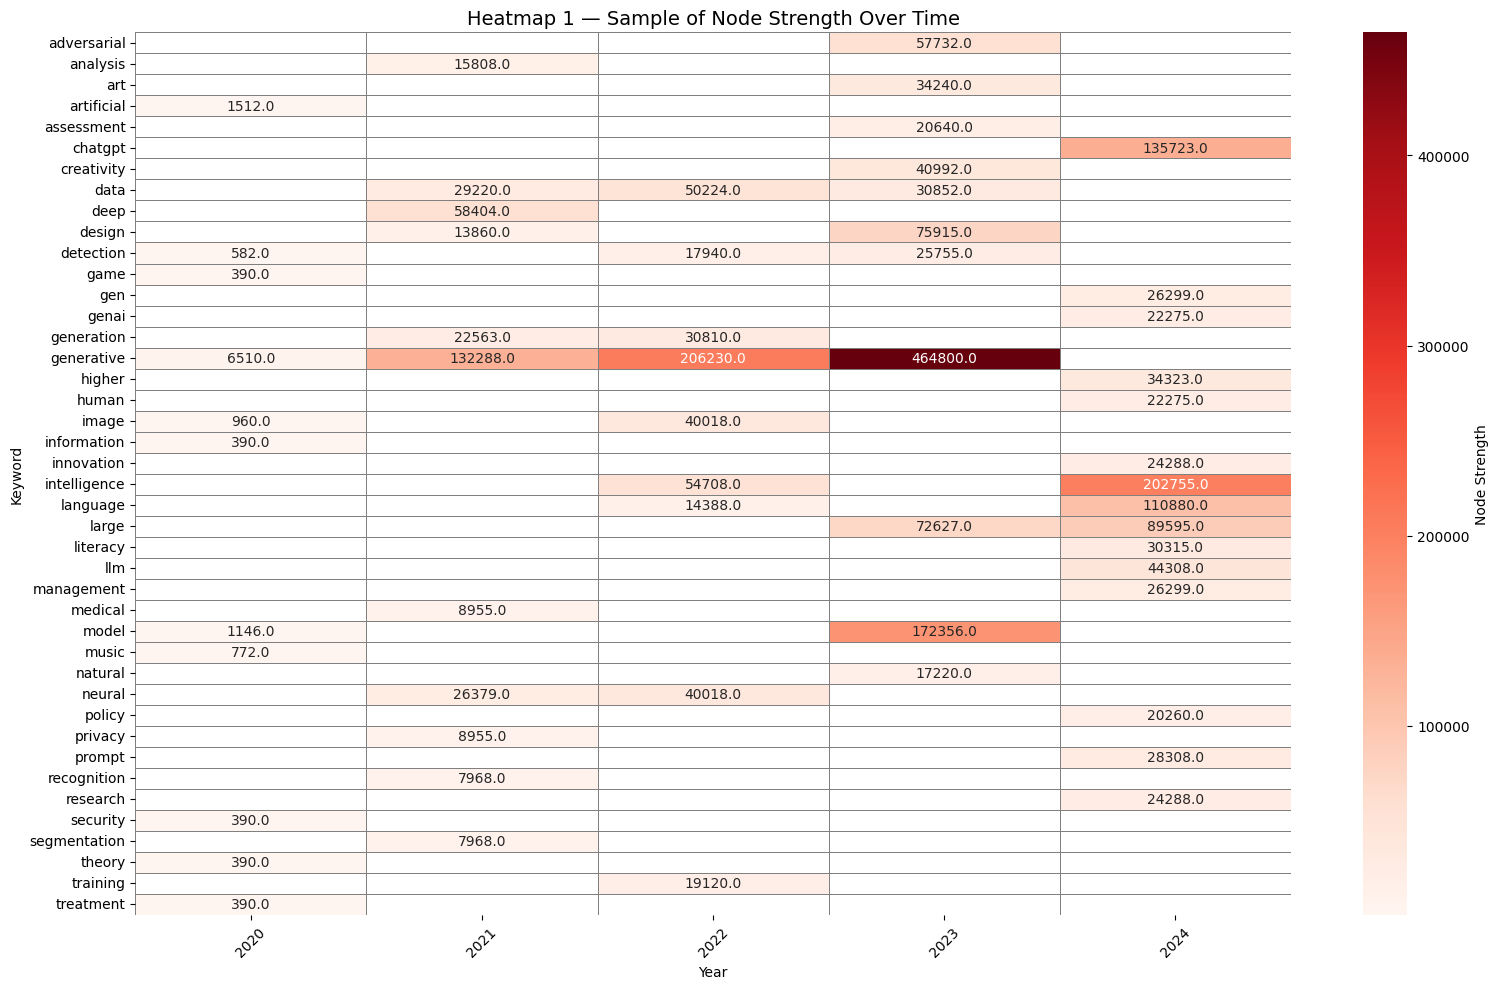

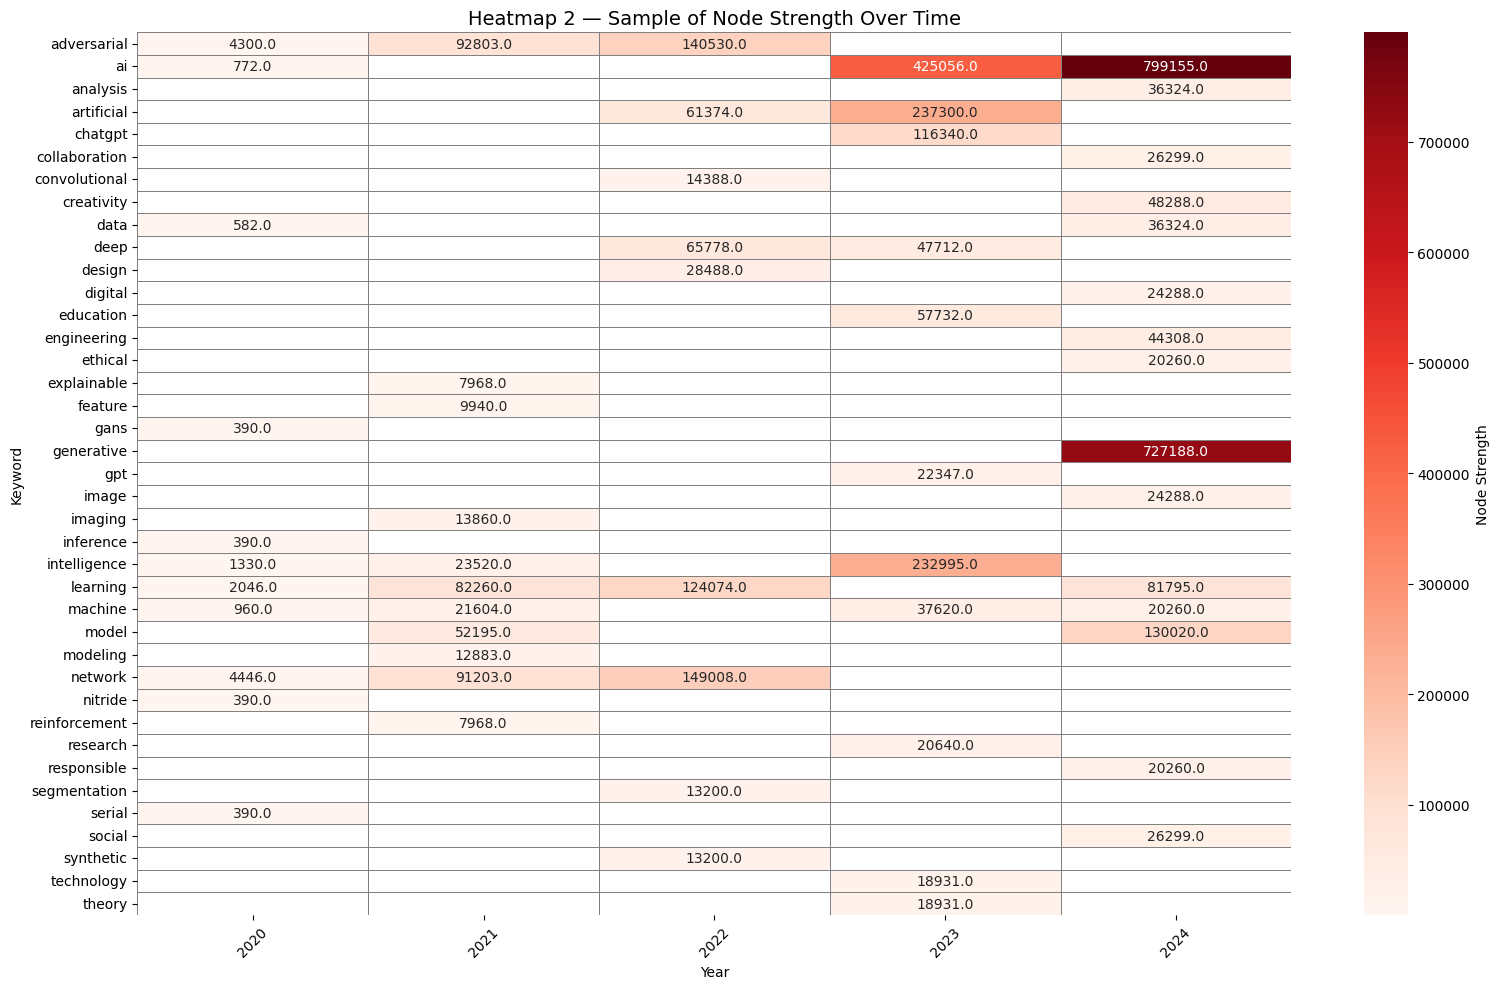

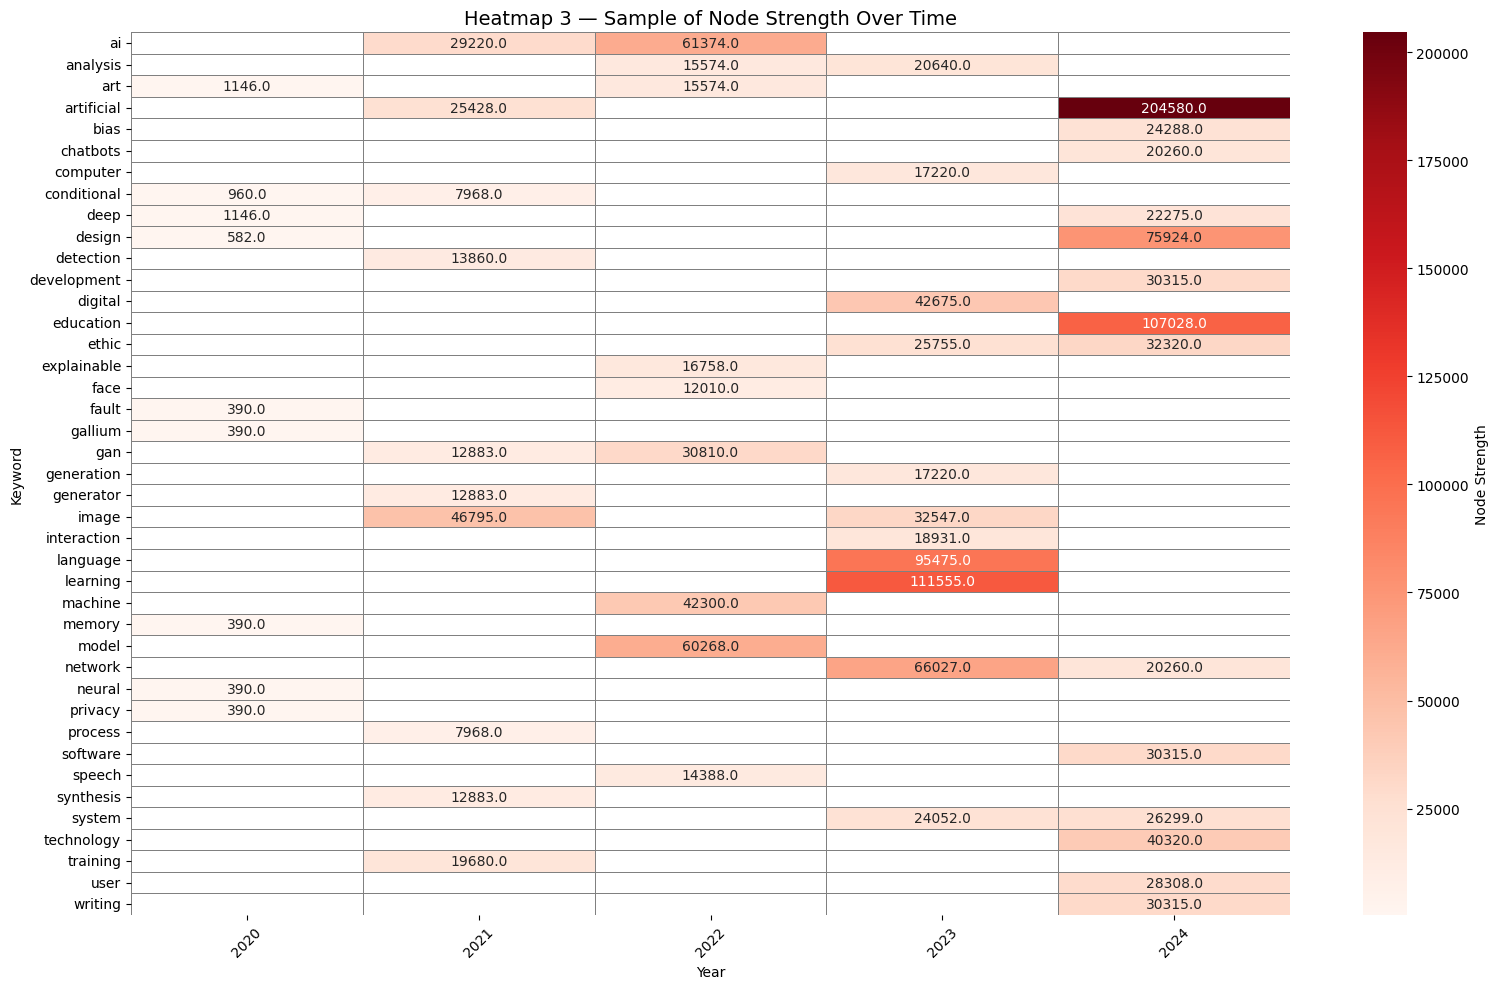

In [16]:
# Heat Map for nodes between 2020-2024
import seaborn as sns
import matplotlib.pyplot as plt

# extra all nodes with year and strength and form a dataframe
# List of graphs and corresponding years
graphs = [G_2020, G_2021, G_2022, G_2023, G_2024]
years = [2020, 2021, 2022, 2023, 2024]

# Store results in a list
data = []

for G, year in zip(graphs, years):
    node_metrics = calculate_node_metrics(G)  # Get metrics
    for _, row in node_metrics.iterrows():
        data.append({
            "Keyword": row["Keyword"],
            "Strength": row["Node Strength"],
            "Year": year
        })

# Create DataFrame
heat_df = pd.DataFrame(data)

from math import ceil

# Step 1: Split data by year
split_by_year = {year: heat_df[heat_df["Year"] == year] for year in years}

# Step 2: Divide each year's data into 3 equal parts
num_splits = 3
split_groups = [[] for _ in range(num_splits)]

for year, df_year in split_by_year.items():
    df_year = df_year.sample(frac=1, random_state=42).reset_index(drop=True)  # Shuffle for randomness
    chunk_size = ceil(len(df_year) / num_splits)

    for i in range(num_splits):
        start = i * chunk_size
        end = start + chunk_size
        split_groups[i].append(df_year.iloc[start:end])

# Step 3: Combine yearly chunks into 3 full subsets
data_subsets = [pd.concat(group).reset_index(drop=True) for group in split_groups]
for i, subset in enumerate(data_subsets, start=1):
    heatmap_data = subset.pivot(index="Keyword", columns="Year", values="Strength")

    plt.figure(figsize=(16, 10))
    sns.heatmap(
        heatmap_data,
        cmap="Reds",
        linewidths=0.5,
        linecolor="gray",
        annot=True,
        fmt=".1f",
        cbar_kws={"label": "Node Strength"}
    )
    plt.title(f"Heatmap {i} — Sample of Node Strength Over Time", fontsize=14)
    plt.xlabel("Year")
    plt.ylabel("Keyword")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

edge level

In [17]:
def edge_analysis(G):
# Extract edge weight distribution
    edges_data = [(u, v, d['weight']) for u, v, d in G.edges(data=True)]
    edges_df = pd.DataFrame(edges_data, columns=['Source', 'Target', 'Weight'])

# Sort edges by weight in descending order
    edges_df_sorted = edges_df.sort_values(by='Weight', ascending=False)

# Compute Jaccard Coefficient (Node Similarity Score)
    jaccard_scores = list(nx.jaccard_coefficient(G))
    jaccard_df = pd.DataFrame(jaccard_scores, columns=['Source', 'Target', 'Jaccard Coefficient'])

# Print top Jaccard Coefficients
    print("\nTop Jaccard Coefficients:")
    print(jaccard_df.sort_values(by="Jaccard Coefficient", ascending=False).head(10))

    return edges_df_sorted

In [18]:
# Edge Level on year 2020
edges_2020_sorted = edge_analysis(G_2020)
print(edges_2020_sorted)


Top Jaccard Coefficients:
Empty DataFrame
Columns: [Source, Target, Jaccard Coefficient]
Index: []
         Source       Target  Weight
2    generative      network    1092
10   generative  adversarial    1050
94      network  adversarial     650
12   generative     learning     462
3    generative   artificial     336
..          ...          ...     ...
441      theory    treatment       4
444      serial         gans       4
445      serial     security       4
446      serial       memory       4
447      serial    treatment       4

[465 rows x 3 columns]


In [19]:
#Edge Level on year 2021
edges_2021_sorted = edge_analysis(G_2021)
print(edges_2021_sorted)


Top Jaccard Coefficients:
Empty DataFrame
Columns: [Source, Target, Jaccard Coefficient]
Index: []
            Source        Target  Weight
7       generative   adversarial   16068
13      generative       network   15756
4       generative      learning   14040
225    adversarial       network   10403
10      generative          deep    9672
..             ...           ...     ...
389  reinforcement  segmentation      64
390  reinforcement       process      64
384  reinforcement   recognition      64
376  reinforcement   conditional      64
479    recognition  segmentation      64

[496 rows x 3 columns]


In [20]:
#Edge Level on year 2022
edges_2022_sorted = edge_analysis(G_2022)
print(edges_2022_sorted)


Top Jaccard Coefficients:
Empty DataFrame
Columns: [Source, Target, Jaccard Coefficient]
Index: []
            Source       Target  Weight
7       generative      network   28495
5       generative  adversarial   26650
11      generative     learning   23165
142    adversarial      network   18070
183        network     learning   15707
..             ...          ...     ...
329       language         face     120
350         speech         face     120
340  convolutional         face     120
335      synthetic         face     110
344   segmentation         face     110

[351 rows x 3 columns]


In [21]:
#Edge Level on year 2023
edges_2023_sorted = edge_analysis(G_2023)
print(edges_2023_sorted)


Top Jaccard Coefficients:
Empty DataFrame
Columns: [Source, Target, Jaccard Coefficient]
Index: []
         Source        Target  Weight
0            ai    generative   98272
50   generative    artificial   49800
47   generative  intelligence   48804
19           ai    artificial   44400
16           ai  intelligence   43512
..          ...           ...     ...
427      theory       natural     110
434      theory      computer     110
347  generation       natural     100
354  generation      computer     100
489     natural      computer     100

[528 rows x 3 columns]


In [22]:
# Edge Level on year 2024
edges_2024_sorted = edge_analysis(G_2024)
print(edges_2024_sorted)


Top Jaccard Coefficients:
Empty DataFrame
Columns: [Source, Target, Jaccard Coefficient]
Index: []
          Source        Target  Weight
0     generative            ai  245322
47            ai    artificial   56286
48            ai  intelligence   55755
5     generative    artificial   48972
6     generative  intelligence   48510
..           ...           ...     ...
645  responsible      chatbots     100
595      machine   responsible     100
625  responsible       ethical     100
623  responsible        policy     100
620      machine      chatbots     100

[946 rows x 3 columns]


network level

In [23]:
!pip install python-louvain
import community.community_louvain as community
def network_analysis(G):
# Network Density (Measure of graph connectivity)
    density = nx.density(G)

    # Modularity (Community Detection using Louvain Method)
    partition = community.best_partition(G)
    modularity = community.modularity(partition, G)

    # Average Shortest Path Length (Only for connected graphs)
    if nx.is_connected(G):
        avg_shortest_path = nx.average_shortest_path_length(G)
    else:
        avg_shortest_path = None  # Not applicable to disconnected graphs

    # Giant Component Analysis
    connected_components = list(nx.connected_components(G))
    giant_component_nodes = max(connected_components, key=len)  # Largest component
    giant_component = G.subgraph(giant_component_nodes).copy()

    # Store results in a dictionary
    network_metrics = {
        "Network Density": density,
        "Modularity": modularity,
        "Average Shortest Path Length": avg_shortest_path,
        "Giant Component Size": giant_component.number_of_nodes(),
        "Giant Component": giant_component  # Return for further analysis
    }

    # Print results
    print(f"Network Density: {density:.4f}")
    print(f"Modularity: {modularity:.4f}")
    if avg_shortest_path is not None:
        print(f"Average Shortest Path Length: {avg_shortest_path:.4f}")
    else:
        print("Graph is not connected. Consider using the largest connected component.")
    print(f"Size of Giant Component: {giant_component.number_of_nodes()} nodes")

    return network_metrics


In [24]:
#Network Level on year 2020
network_metrics_2020 = network_analysis(G_2020)

Network Density: 1.0000
Modularity: 0.0000
Average Shortest Path Length: 1.0000
Size of Giant Component: 31 nodes


In [25]:
#Network Level on year 2021
network_metrics_2021 = network_analysis(G_2021)

Network Density: 1.0000
Modularity: 0.0000
Average Shortest Path Length: 1.0000
Size of Giant Component: 32 nodes


In [26]:
#Network Level on year 2022
network_metrics_2022 = network_analysis(G_2022)

Network Density: 1.0000
Modularity: 0.0000
Average Shortest Path Length: 1.0000
Size of Giant Component: 27 nodes


In [27]:
#Network Level on year 2023
network_metrics_2023 = network_analysis(G_2023)

Network Density: 1.0000
Modularity: 0.0000
Average Shortest Path Length: 1.0000
Size of Giant Component: 33 nodes


In [28]:
#Network Level on year 2024
network_metrics_2024 = network_analysis(G_2024)

Network Density: 1.0000
Modularity: 0.0000
Average Shortest Path Length: 1.0000
Size of Giant Component: 44 nodes
